In [2]:
# import needed libraries
import pandas as pd 

# import graphing library
import matplotlib.pyplot as plt

import os  # for OS interface (to get/change directory)
# display and set working/data directory
os.getcwd()
os.chdir('D:/spring 23/724-DataAnalytics_SocialMedia/Project/github/NLP_on_Social_Media_Data/src/data_preprocess')
os.getcwd()

'D:\\spring 23\\724-DataAnalytics_SocialMedia\\Project\\github\\NLP_on_Social_Media_Data\\src\\data_preprocess'

In [8]:
combined_df = pd.read_csv("../../data/project_data.2023-03-11_13.11.55.783862.csv", sep=",", index_col=0)

<ipython-input-8-667d21bffcdc>:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv("../../data/project_data.2023-03-11_13.11.55.783862.csv", sep=",", index_col=0)


In [9]:
combined_df.head()

,conversation_id,lang,reply_settings,created_at,text,author_id,referenced_tweets,id,edit_history_tweet_ids,public_metrics.retweet_count,...,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,in_reply_to_user_id,geo.place_id,withheld.copyright,withheld.country_codes,keyword,geo.coordinates.type,geo.coordinates.coordinates
0,1633954063934009344,en,everyone,2023-03-09 22:13:00+00:00,RT @Infantry_bucky: He’s lucky a #ChrisRockLiv...,1519164980582653952,"[{'type': 'retweeted', 'id': '1633938373529292...",1633954063934009344,['1633954063934009354'],8,...,0,0,0,NaN,NaN,NaN,NaN,#chrisrocklive,NaN,NaN
1,1633954058212876288,en,everyone,2023-03-09 22:12:59+00:00,RT @1_ofakindnocap: Chris Rock: “we all been c...,21575184,"[{'type': 'retweeted', 'id': '1632283297588948...",1633954058212876288,['1633954058212876289'],616,...,0,0,0,NaN,NaN,NaN,NaN,#chrisrocklive,NaN,NaN
2,1633951267423768576,en,everyone,2023-03-09 22:01:54+00:00,RT @1_ofakindnocap: Chris Rock: “we all been c...,360633018,"[{'type': 'retweeted', 'id': '1632283297588948...",1633951267423768576,['1633951267423768578'],616,...,0,0,0,NaN,NaN,NaN,NaN,#chrisrocklive,NaN,NaN
3,1633950853626318848,en,everyone,2023-03-09 22:00:15+00:00,RT @rolandsmartin: Working out and watching th...,1547101103803830272,"[{'type': 'retweeted', 'id': '1632825595473149...",1633950853626318848,['1633950853626318850'],14,...,0,0,0,NaN,NaN,NaN,NaN,#chrisrocklive,NaN,NaN
4,1633950824664645632,en,everyone,2023-03-09 22:00:08+00:00,RT @rolandsmartin: Workout done. I’ll have a f...,1547101103803830272,"[{'type': 'retweeted', 'id': '1632833853021728...",1633950824664645632,['1633950824664645634'],8,...,0,0,0,NaN,NaN,NaN,NaN,#chrisrocklive,NaN,NaN


In [10]:
duplicated_rows = combined_df.duplicated().sum()

In [11]:
duplicated_rows

4290

In [12]:
combined_df.shape[0]

36581

Out of 36581 data 4290 are duplicated, which is not bad.

In [14]:
#drop duplicates
combined_df = combined_df.drop_duplicates()

In [16]:
combined_df.shape[0] # these are total number of unique values we got

32291

# Eploratory Data Analysis

In [17]:
import re
import nltk
from nltk.stem import WordNetLemmatizer

In [18]:
def clean_tweets(tweets):
    # Stopword removal, converting uppercase into lower case, and lemmatization
    stopwords = nltk.corpus.stopwords.words('english')
    lemmatizer = WordNetLemmatizer()
    nltk.download('stopwords')
    data_without_stopwords = []
    for i in range(0, len(tweets)):
        doc = re.sub('[^a-zA-Z]', ' ' , tweets[i])
        doc = doc.lower()
        doc = doc.split()
        doc = [lemmatizer.lemmatize(word) for word in doc if not word in set(stopwords)]
        doc = ' '.join(doc)
        data_without_stopwords.append(doc)
        
    return data_without_stopwords

In [19]:
tweets = [i for i in combined_df["text"]]

In [ ]:
# tweets #remove comment to see tweets

In [20]:
cleaned_tweets = clean_tweets(tweets) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# cleaned_tweets #remove comment to see cleaned tweets

In [22]:
#Add clean_text to existing combined_df dataframe
combined_df['clean_text'] = cleaned_tweets

In [23]:
new_order = [
    'conversation_id', 
    'lang', 
    'reply_settings', 
    'created_at', 
    'clean_text',
    'text',
    'author_id',
    'referenced_tweets',
    'id',
    'edit_history_tweet_ids',
    'public_metrics.retweet_count',
    'public_metrics.reply_count',
    'public_metrics.like_count',
    'public_metrics.impression_count',
    'in_reply_to_user_id',
    'geo.place_id',
    'withheld.copyright',
    'withheld.country_codes',
    'geo.coordinates.type',
    'geo.coordinates.coordinates'
]

In [24]:
combined_df = combined_df.reindex(columns=new_order)

In [25]:
# pd.set_option('display.max_columns', None)
combined_df.head()

,conversation_id,lang,reply_settings,created_at,clean_text,text,author_id,referenced_tweets,id,edit_history_tweet_ids,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.impression_count,in_reply_to_user_id,geo.place_id,withheld.copyright,withheld.country_codes,geo.coordinates.type,geo.coordinates.coordinates
0,1633954063934009344,en,everyone,2023-03-09 22:13:00+00:00,rt infantry bucky lucky chrisrocklive worse th...,RT @Infantry_bucky: He’s lucky a #ChrisRockLiv...,1519164980582653952,"[{'type': 'retweeted', 'id': '1633938373529292...",1633954063934009344,['1633954063934009354'],8,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1633954058212876288,en,everyone,2023-03-09 22:12:59+00:00,rt ofakindnocap chris rock cheated never perso...,RT @1_ofakindnocap: Chris Rock: “we all been c...,21575184,"[{'type': 'retweeted', 'id': '1632283297588948...",1633954058212876288,['1633954058212876289'],616,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1633951267423768576,en,everyone,2023-03-09 22:01:54+00:00,rt ofakindnocap chris rock cheated never perso...,RT @1_ofakindnocap: Chris Rock: “we all been c...,360633018,"[{'type': 'retweeted', 'id': '1632283297588948...",1633951267423768576,['1633951267423768578'],616,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1633950853626318848,en,everyone,2023-03-09 22:00:15+00:00,rt rolandsmartin working watching chrisrock ne...,RT @rolandsmartin: Working out and watching th...,1547101103803830272,"[{'type': 'retweeted', 'id': '1632825595473149...",1633950853626318848,['1633950853626318850'],14,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1633950824664645632,en,everyone,2023-03-09 22:00:08+00:00,rt rolandsmartin workout done comment chrisroc...,RT @rolandsmartin: Workout done. I’ll have a f...,1547101103803830272,"[{'type': 'retweeted', 'id': '1632833853021728...",1633950824664645632,['1633950824664645634'],8,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# pip install -U textblob  //you may need to install the package first
from textblob import TextBlob
#function to get the subjectivity 
def get_subjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

#create a function to get the polarity
def get_polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

#create two new columns
combined_df['Subjectivity'] = combined_df['clean_text'].apply(get_subjectivity)
combined_df['Polarity'] = combined_df['clean_text'].apply(get_polarity)

In [27]:
# note subjectivity value between 0 to 1, 0 meaning completely objective text with no personal opinion
# polarity values between -1 to +1 , -1 referring to highly negative sentiment
combined_df

,conversation_id,lang,reply_settings,created_at,clean_text,text,author_id,referenced_tweets,id,edit_history_tweet_ids,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.impression_count,in_reply_to_user_id,geo.place_id,withheld.copyright,withheld.country_codes,geo.coordinates.type,geo.coordinates.coordinates,Subjectivity,Polarity
0,1633954063934009344,en,everyone,2023-03-09 22:13:00+00:00,rt infantry bucky lucky chrisrocklive worse th...,RT @Infantry_bucky: He’s lucky a #ChrisRockLiv...,1519164980582653952,"[{'type': 'retweeted', 'id': '1633938373529292...",1633954063934009344,['1633954063934009354'],8,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.527778,-0.038889
1,1633954058212876288,en,everyone,2023-03-09 22:12:59+00:00,rt ofakindnocap chris rock cheated never perso...,RT @1_ofakindnocap: Chris Rock: “we all been c...,21575184,"[{'type': 'retweeted', 'id': '1632283297588948...",1633954058212876288,['1633954058212876289'],616,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2,1633951267423768576,en,everyone,2023-03-09 22:01:54+00:00,rt ofakindnocap chris rock cheated never perso...,RT @1_ofakindnocap: Chris Rock: “we all been c...,360633018,"[{'type': 'retweeted', 'id': '1632283297588948...",1633951267423768576,['1633951267423768578'],616,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
3,1633950853626318848,en,everyone,2023-03-09 22:00:15+00:00,rt rolandsmartin working watching chrisrock ne...,RT @rolandsmartin: Working out and watching th...,1547101103803830272,"[{'type': 'retweeted', 'id': '1632825595473149...",1633950853626318848,['1633950853626318850'],14,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.535714,0.246753
4,1633950824664645632,en,everyone,2023-03-09 22:00:08+00:00,rt rolandsmartin workout done comment chrisroc...,RT @rolandsmartin: Workout done. I’ll have a f...,1547101103803830272,"[{'type': 'retweeted', 'id': '1632833853021728...",1633950824664645632,['1633950824664645634'],8,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.535714,0.246753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36576,1633873450594091008,en,everyone,2023-03-09 16:52:41+00:00,rt ministerboomer way susannem maybe take deto...,RT @MinisterBoomer: On the way to @SusanneM090...,1364374610922323968,"[{'type': 'retweeted', 'id': '1633019489641017...",1633873450594091008,['1633873450594091015'],14,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.000000
36577,1633873450422140928,en,everyone,2023-03-09 16:52:41+00:00,russia ukraine belarus occupier planning large...,#Russia 🇷🇺 / #Ukraine 🇺🇦 / #Belarus 🇧🇾\r\n\r\n...,985264069816061952,NaN,1633873450422140928,['1633873450422140928'],1,0,4,142,NaN,NaN,NaN,NaN,NaN,NaN,0.428571,0.214286
36578,1633873447897149440,en,everyone,2023-03-09 16:52:40+00:00,rt kajakallas year ago soviet plane bombed tal...,RT @kajakallas: 79 years ago Soviet planes bom...,1250015178248290304,"[{'type': 'retweeted', 'id': '1633741101885542...",1633873447897149440,['1633873447897149444'],1305,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
36579,1633873447108632576,en,everyone,2023-03-09 16:52:40+00:00,rt sternenko today civilian killed russian khe...,RT @sternenko: Today 4 civilians were killed b...,1495109228876468224,"[{'type': 'retweeted', 'id': '1633803881447604...",1633873447108632576,['1633873447108632576'],1541,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-0.100000


In [28]:
#Statistics on the data, mean, median, std deviation, etc.
combined_df.describe()

,conversation_id,author_id,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.impression_count,in_reply_to_user_id,withheld.copyright,Subjectivity,Polarity
count,3.229100e+04,3.229100e+04,3.229100e+04,32291.000000,32291.000000,32291.000000,32291.000000,5.040000e+03,46.0,32291.000000,32291.000000
mean,1.633030e+18,7.564114e+17,1.633643e+18,1294.302251,0.102567,0.775077,81.513270,5.989568e+17,0.0,0.271075,0.059450
std,1.736729e+16,6.880289e+17,3.096322e+14,2876.387029,1.407104,17.833157,2366.507497,6.688815e+17,0.0,0.304545,0.243973
min,4.973844e+17,2.360000e+03,1.631455e+18,0.000000,0.000000,0.000000,0.000000,1.605000e+03,0.0,0.000000,-1.000000
25%,1.633530e+18,5.606210e+08,1.633642e+18,0.000000,0.000000,0.000000,0.000000,1.500790e+08,0.0,0.000000,0.000000
50%,1.633669e+18,9.002723e+17,1.633671e+18,38.000000,0.000000,0.000000,0.000000,3.000663e+09,0.0,0.185000,0.000000
75%,1.633875e+18,1.477027e+18,1.633876e+18,606.000000,0.000000,0.000000,2.000000,1.341945e+18,0.0,0.500000,0.136364
max,1.633984e+18,1.633981e+18,1.633984e+18,74592.000000,177.000000,1887.000000,372431.000000,1.633867e+18,0.0,1.000000,1.000000


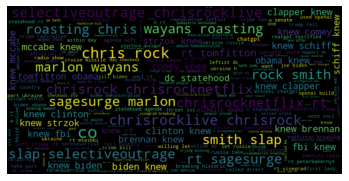

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# may have to do this: pip install wordcloud
# word cloud to see how well sentiments are distributed
#visualization the more specific the word appear in the text, the bigger and bolder it appears in the word cloud.

words = ' '.join( [tweets for tweets in combined_df['clean_text']])
word_cloud = WordCloud(width=800, height=400, random_state=21, max_font_size=40).generate(words)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()